In [1]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.11.0


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# more details about the dataset in this link https://archive.ics.uci.edu/ml/datasets/auto+mpg
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'C:\\Users\\DTE-LAPC-128-21\\.keras\\datasets\\auto-mpg.data'

In [4]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model Year', 'Origin']
dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [5]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


## Prepare the data

In [6]:
# Prepare the data
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [7]:
dataset = dataset.dropna()
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [8]:
dataset = dataset.drop_duplicates()
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [9]:
# The "Origin" column is really categorical, not numeric. So convert that to a one-hot
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,USA
394,44.0,4,97.0,52.0,2130.0,24.6,82,Europe
395,32.0,4,135.0,84.0,2295.0,11.6,82,USA
396,28.0,4,120.0,79.0,2625.0,18.6,82,USA


In [10]:
# one-hot encoding
dataset = pd.get_dummies(dataset, prefix='Origin', prefix_sep='_')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_Europe,Origin_Japan,Origin_USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [11]:
dataset.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Origin_Europe', 'Origin_Japan',
       'Origin_USA'],
      dtype='object')

In [12]:
dataset.shape

(392, 10)

In [13]:
# Split the data into train (80%) and test (%20)
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [14]:
train_dataset.shape , test_dataset.shape

((314, 10), (78, 10))

In [15]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
MPG,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
Cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
Displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
Horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
Weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
Acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
Model Year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
Origin_Europe,392.0,0.173469,0.379136,0.0,0.000,0.00,0.000,1.0
Origin_Japan,392.0,0.201531,0.401656,0.0,0.000,0.00,0.000,1.0
Origin_USA,392.0,0.625000,0.484742,0.0,0.000,1.00,1.000,1.0


In [16]:
norm_cols = ['Displacement', 'Horsepower', 'Weight', 'Acceleration']

train_stats = train_dataset[norm_cols].describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8


# self study :
- Handle "Model Year" feature
- Try transformer for feature engineering

In [17]:
#  Split features from labels (miles per gallon= MPG)
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

# normalize the data
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

train_dataset[norm_cols] = norm(train_dataset[norm_cols])
test_dataset[norm_cols] = norm(test_dataset[norm_cols])

In [18]:
train_dataset

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_Europe,Origin_Japan,Origin_USA
146,4,-1.009459,-0.784052,-1.025303,-0.379759,74,0,0,1
282,4,-0.530218,-0.442811,-0.118796,0.624102,79,0,0,1
69,8,1.482595,1.447140,1.736877,-0.738281,72,0,0,1
378,4,-0.865687,-1.099044,-1.025303,-0.308055,82,0,0,1
331,4,-0.942365,-0.994047,-1.001603,0.875068,80,0,1,0
...,...,...,...,...,...,...,...,...,...
281,6,0.044872,-0.521559,-0.000298,0.946772,79,0,0,1
229,8,1.961837,1.972127,1.457223,-1.598734,77,0,0,1
150,4,-0.836932,-0.311564,-0.710099,-0.021237,74,0,1,0
145,4,-1.076553,-1.151543,-1.169870,1.233589,74,0,1,0


In [19]:
normed_train_data = train_dataset.copy()
normed_test_data = test_dataset.copy()

In [20]:
normed_train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707e+00,1.699788,3.000000,4.000000,4.000000,8.000000,8.000000
Displacement,314.0,8.627211e-17,1.000000,-1.220325,-0.860894,-0.424785,0.675074,2.489002
Horsepower,314.0,-9.900078e-18,1.000000,-1.545283,-0.751241,-0.272190,0.607162,3.153347
Weight,314.0,-8.485781e-17,1.000000,-1.589352,-0.869478,-0.198782,0.732017,2.547401
Acceleration,314.0,-5.148041e-16,1.000000,-2.710152,-0.630725,-0.021237,0.588250,3.313017
Model Year,314.0,7.589809e+01,3.675642,70.000000,73.000000,76.000000,79.000000,82.000000
Origin_Europe,314.0,1.783439e-01,0.383413,0.000000,0.000000,0.000000,0.000000,1.000000
Origin_Japan,314.0,1.974522e-01,0.398712,0.000000,0.000000,0.000000,0.000000,1.000000
Origin_USA,314.0,6.242038e-01,0.485101,0.000000,0.000000,1.000000,1.000000,1.000000


## Build the ANN model

In [21]:
train_dataset.shape[1], len(train_dataset.keys())

(9, 9)

In [22]:
def build_model(input_shape=9, output_shape=1, activation='relu'):
  model = keras.Sequential([
    layers.Dense(50, activation=activation, input_shape=[input_shape]),
    layers.Dense(50, activation=activation),
    layers.Dense(50, activation=activation),
    layers.Dense(50, activation=activation),
    layers.Dense(output_shape)])

  # if there is no activation fuction in dense layer. then it will return sum of (weight * features + bias)
  optimizer = tf.keras.optimizers.RMSprop(0.0001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

Epoch 1/100


C:\Users\DTE-LAPC-128-21\AppData\Roaming\Python\Python310\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


9/9 [==============================] - 1s 31ms/step - loss: 601.0880 - mae: 23.3046 - mse: 601.0880 - val_loss: 606.5071 - val_mae: 23.1068 - val_mse: 606.5071
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 595.6807 - mae: 23.1871 - mse: 595.6807 - val_loss: 602.0302 - val_mae: 23.0097 - val_mse: 602.0302
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 591.4089 - mae: 23.0936 - mse: 591.4089 - val_loss: 597.9996 - val_mae: 22.9219 - val_mse: 597.9996
Epoch 4/100
9/9 [==============================] - 0s 9ms/step - loss: 587.3843 - mae: 23.0076 - mse: 587.3843 - val_loss: 594.0093 - val_mae: 22.8347 - val_mse: 594.0093
Epoch 5/100
9/9 [==============================] - 0s 9ms/step - loss: 583.4259 - mae: 22.9206 - mse: 583.4259 - val_loss: 590.1306 - val_mae: 22.7497 - val_mse: 590.1306
Epoch 6/100
9/9 [==============================] - 0s 9ms/step - loss: 579.5284 - mae: 22.8356 - mse: 579.5284 - val_loss: 586.2598 - val_mae: 22.6644 - val

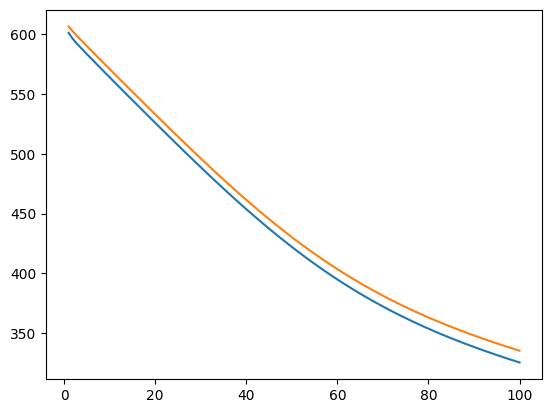

3/3 - 0s - loss: 354.4097 - mae: 17.0030 - mse: 354.4097 - 177ms/epoch - 59ms/step
Testing set Mean Abs Error: 17.00 MPG
Testing set Mean Squared Error: 354.41 MPG**2


In [23]:

EPOCHS = 100
# model build
model = build_model(activation='sigmoid')
# model.summary()

# training and plot mse vs val_mse
history = model.fit(normed_train_data, train_labels, epochs=EPOCHS, validation_split = 0.1, verbose=1)
sns.lineplot(x= range(1, EPOCHS+1), y=history.history['mse'])
sns.lineplot(x=range(1, EPOCHS+1), y=history.history['val_mse'])
plt.show()

# evaluation
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))
print("Testing set Mean Squared Error: {:5.2f} MPG**2".format(mse))

Epoch 1/100


C:\Users\DTE-LAPC-128-21\AppData\Roaming\Python\Python310\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


9/9 [==============================] - 1s 51ms/step - loss: 479.9782 - mae: 20.5833 - mse: 479.9782 - val_loss: 413.1532 - val_mae: 18.4885 - val_mse: 413.1532
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 364.2578 - mae: 17.5625 - mse: 364.2578 - val_loss: 329.2471 - val_mae: 16.0961 - val_mse: 329.2471
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 288.0669 - mae: 15.2566 - mse: 288.0669 - val_loss: 262.0243 - val_mae: 13.8867 - val_mse: 262.0243
Epoch 4/100
9/9 [==============================] - 0s 8ms/step - loss: 226.6195 - mae: 13.1155 - mse: 226.6195 - val_loss: 209.4412 - val_mae: 11.8728 - val_mse: 209.4412
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 178.0716 - mae: 11.1641 - mse: 178.0716 - val_loss: 166.3643 - val_mae: 10.1075 - val_mse: 166.3643
Epoch 6/100
9/9 [==============================] - 0s 11ms/step - loss: 137.9236 - mae: 9.3850 - mse: 137.9236 - val_loss: 130.5335 - val_mae: 8.7257 - val_

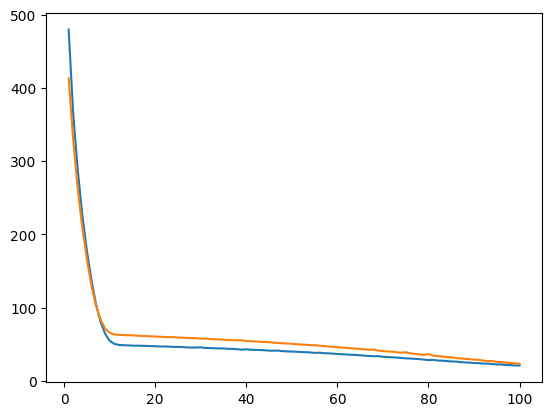

Testing set Mean Abs Error:  3.58 MPG
Testing set Mean Squared Error: 20.25 MPG**2


In [24]:
# model build
model = build_model(activation='relu')
# model.summary()

# training and plot mse vs val_mse
history = model.fit(normed_train_data, train_labels, epochs=EPOCHS, validation_split = 0.1, verbose=1)
sns.lineplot(x= range(1, EPOCHS+1), y=history.history['mse'])
sns.lineplot(x=range(1, EPOCHS+1), y=history.history['val_mse'])
plt.show()

# evaluation
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))
print("Testing set Mean Squared Error: {:5.2f} MPG**2".format(mse))

Epoch 1/100


C:\Users\DTE-LAPC-128-21\AppData\Roaming\Python\Python310\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


9/9 [==============================] - 1s 33ms/step - loss: 579.9209 - mae: 22.7586 - mse: 579.9209 - val_loss: 487.5259 - val_mae: 20.2860 - val_mse: 487.5259
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 430.9236 - mae: 19.2214 - mse: 430.9236 - val_loss: 385.5144 - val_mae: 17.6262 - val_mse: 385.5144
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 334.4614 - mae: 16.6217 - mse: 334.4614 - val_loss: 295.1352 - val_mae: 14.8897 - val_mse: 295.1352
Epoch 4/100
9/9 [==============================] - 0s 6ms/step - loss: 251.9397 - mae: 13.9491 - mse: 251.9397 - val_loss: 226.0222 - val_mae: 12.4087 - val_mse: 226.0222
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 190.0022 - mae: 11.5924 - mse: 190.0022 - val_loss: 173.6061 - val_mae: 10.3122 - val_mse: 173.6061
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 141.9782 - mae: 9.5254 - mse: 141.9782 - val_loss: 132.9440 - val_mae: 8.8294 - val_m

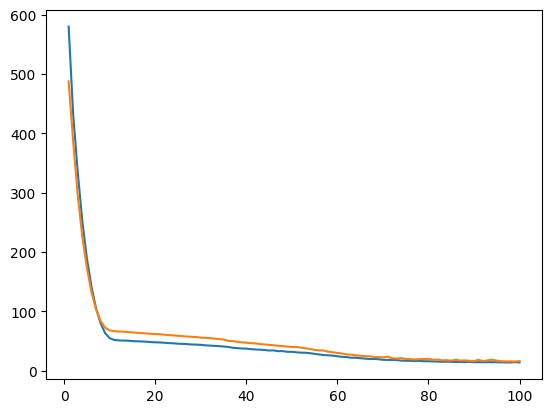

Testing set Mean Abs Error:  2.45 MPG
Testing set Mean Squared Error: 12.17 MPG**2


In [25]:
# model build
model = build_model(activation='leaky_relu')
# model.summary()

# training and plot mse vs val_mse
history = model.fit(normed_train_data, train_labels, epochs=EPOCHS, validation_split = 0.1, verbose=1)
sns.lineplot(x= range(1, EPOCHS+1), y=history.history['mse'])
sns.lineplot(x=range(1, EPOCHS+1), y=history.history['val_mse'])
plt.show()

# evaluation
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))
print("Testing set Mean Squared Error: {:5.2f} MPG**2".format(mse))

Epoch 1/100


C:\Users\DTE-LAPC-128-21\AppData\Roaming\Python\Python310\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


9/9 [==============================] - 1s 26ms/step - loss: 592.1111 - mae: 23.1135 - mse: 592.1111 - val_loss: 578.3136 - val_mae: 22.4946 - val_mse: 578.3136
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 556.3431 - mae: 22.3245 - mse: 556.3431 - val_loss: 549.7161 - val_mae: 21.8493 - val_mse: 549.7161
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 529.5431 - mae: 21.7171 - mse: 529.5431 - val_loss: 524.9985 - val_mae: 21.2758 - val_mse: 524.9985
Epoch 4/100
9/9 [==============================] - 0s 6ms/step - loss: 505.7417 - mae: 21.1655 - mse: 505.7417 - val_loss: 502.6042 - val_mae: 20.7424 - val_mse: 502.6042
Epoch 5/100
9/9 [==============================] - 0s 8ms/step - loss: 484.0931 - mae: 20.6446 - mse: 484.0931 - val_loss: 482.2086 - val_mae: 20.2441 - val_mse: 482.2086
Epoch 6/100
9/9 [==============================] - 0s 7ms/step - loss: 464.3237 - mae: 20.1562 - mse: 464.3237 - val_loss: 463.3914 - val_mae: 19.7733 - val

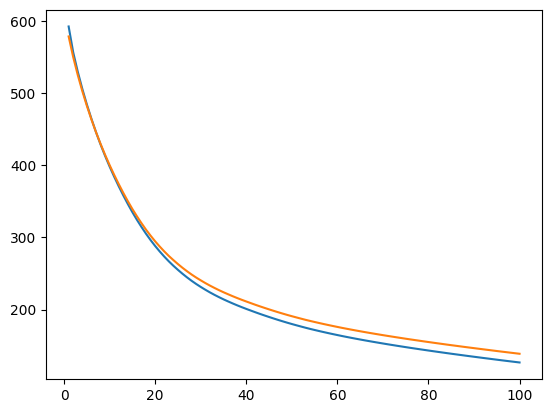

Testing set Mean Abs Error:  9.64 MPG
Testing set Mean Squared Error: 145.04 MPG**2


In [26]:
# model build
model = build_model(activation='tanh')
# model.summary()

# training and plot mse vs val_mse
history = model.fit(normed_train_data, train_labels, epochs=EPOCHS, validation_split = 0.1, verbose=1)
sns.lineplot(x= range(1, EPOCHS+1), y=history.history['mse'])
sns.lineplot(x=range(1, EPOCHS+1), y=history.history['val_mse'])
plt.show()

# evaluation
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))
print("Testing set Mean Squared Error: {:5.2f} MPG**2".format(mse))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 50)                500       
                                                                 
 dense_21 (Dense)            (None, 50)                2550      
                                                                 
 dense_22 (Dense)            (None, 50)                2550      
                                                                 
 dense_23 (Dense)            (None, 50)                2550      
                                                                 
 dense_24 (Dense)            (None, 1)                 51        
                                                                 
Total params: 8,201
Trainable params: 8,201
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


C:\Users\DTE-LAPC-128-21\AppData\Roaming\Python\Python310\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


9/9 [==============================] - 1s 29ms/step - loss: 787.6140 - mae: 27.0053 - mse: 787.6140 - val_loss: 694.8855 - val_mae: 25.0187 - val_mse: 694.8855
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 631.0670 - mae: 23.9845 - mse: 631.0670 - val_loss: 578.2753 - val_mae: 22.5844 - val_mse: 578.2753
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 526.3386 - mae: 21.7101 - mse: 526.3386 - val_loss: 486.4996 - val_mae: 20.4627 - val_mse: 486.4996
Epoch 4/100
9/9 [==============================] - 0s 6ms/step - loss: 441.2567 - mae: 19.6816 - mse: 441.2567 - val_loss: 409.9840 - val_mae: 18.5117 - val_mse: 409.9840
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 369.6884 - mae: 17.7844 - mse: 369.6884 - val_loss: 344.8302 - val_mae: 16.6791 - val_mse: 344.8302
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 308.4250 - mae: 15.9869 - mse: 308.4250 - val_loss: 288.7191 - val_mae: 14.9246 - val

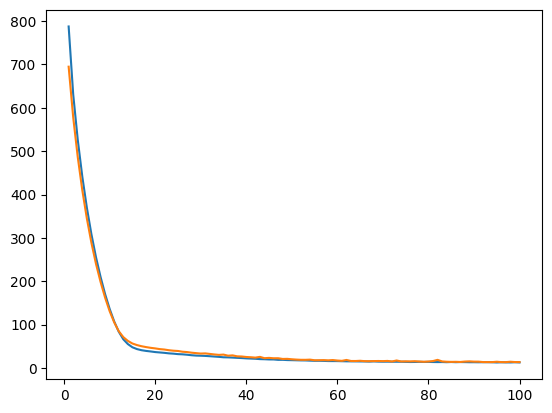

Testing set Mean Abs Error:  2.30 MPG
Testing set Mean Squared Error: 10.95 MPG**2


In [27]:
# model build
model = build_model(activation='swish')
model.summary()

# training and plot mse vs val_mse
history = model.fit(normed_train_data, train_labels, epochs=EPOCHS, validation_split = 0.1, verbose=1)
sns.lineplot(x= range(1, EPOCHS+1), y=history.history['mse'])
sns.lineplot(x=range(1, EPOCHS+1), y=history.history['val_mse'])
plt.show()

# evaluation
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))
print("Testing set Mean Squared Error: {:5.2f} MPG**2".format(mse))